In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns
import numpy as np


#change date format
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M')
#import data
df = pd.read_csv(r'C:\Users\danie\home test - GA\data.csv', parse_dates=['datetime'], date_parser=dateparse)
#create month, day, timecolumn
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["time"] = df["datetime"].dt.hour*3600 + df["datetime"].dt.minute*60 + df["datetime"].dt.second
#for different model comparisons
test_results = {}

print(df['season'].count())

10886


In [2]:
print(df.isna().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
time          0
dtype: int64


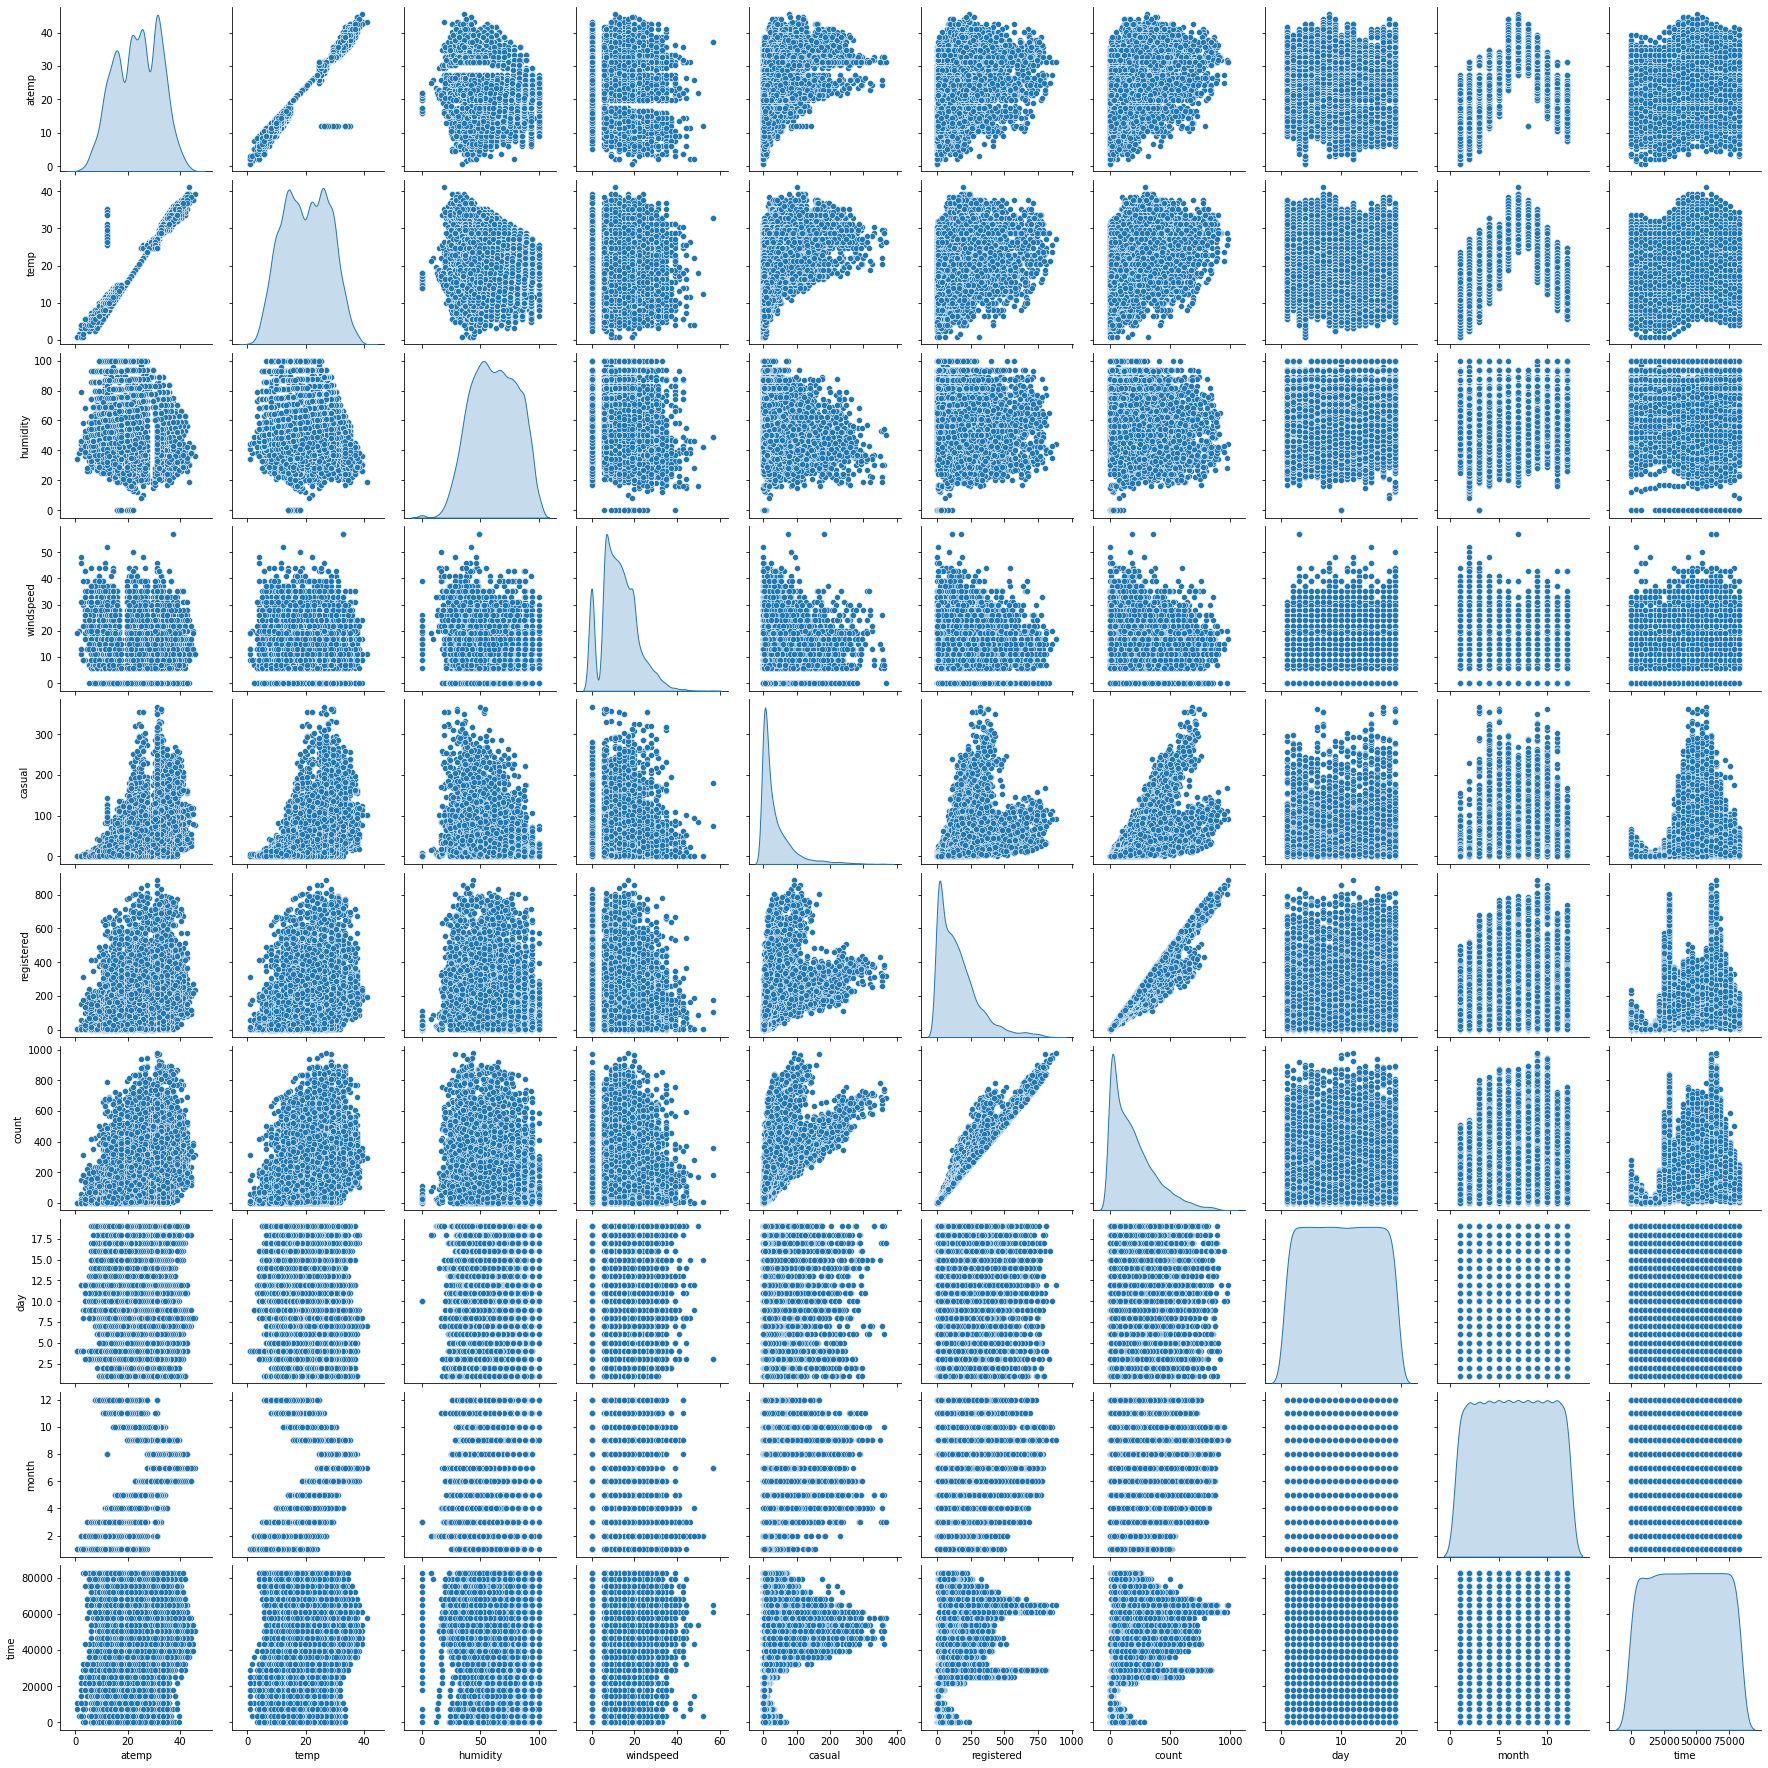

In [3]:
#Correlation tests
sns.pairplot(df[['atemp','temp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'day', 'month', 'time']], diag_kind='kde')


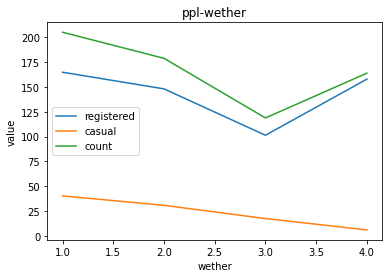

In [4]:
#Correlation tests
temp1 = df[['weather','registered']].groupby('weather').mean()
temp2 = df[['weather','casual']].groupby('weather').mean()
temp3 = df[['weather','count']].groupby('weather').mean()

plt.plot(temp1,label='registered')
plt.plot(temp2,label='casual')
plt.plot(temp3,label='count')
plt.legend()
plt.ylabel('value')
plt.xlabel('wether')
plt.title("ppl-wether")

plt.show()

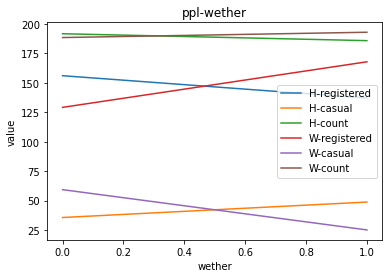

In [5]:
#Correlation tests
temp1 = df[['holiday','registered']].groupby('holiday').mean()
temp2 = df[['holiday','casual']].groupby('holiday').mean()
temp3 = df[['holiday','count']].groupby('holiday').mean()

temp4 = df[['workingday','registered']].groupby('workingday').mean()
temp5 = df[['workingday','casual']].groupby('workingday').mean()
temp6 = df[['workingday','count']].groupby('workingday').mean()

plt.plot(temp1,label='H-registered')
plt.plot(temp2,label='H-casual')
plt.plot(temp3,label='H-count')
plt.plot(temp4,label='W-registered')
plt.plot(temp5,label='W-casual')
plt.plot(temp6,label='W-count')
plt.legend()
plt.ylabel('value')
plt.xlabel('wether')
plt.title("ppl-wether")

plt.show()

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter '})
df['weather'] = df['weather'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,day,time,fall,spring,summer,winter,Clear,Heavy Rain,Light Rain,Mist
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,7,329,336,...,19,68400,0,0,0,1,1,0,0,0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,10,231,241,...,19,72000,0,0,0,1,1,0,0,0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,4,164,168,...,19,75600,0,0,0,1,1,0,0,0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,12,117,129,...,19,79200,0,0,0,1,1,0,0,0
10885,2012-12-19 23:00:00,0,1,13.12,16.665,66,8.9981,4,84,88,...,19,82800,0,0,0,1,1,0,0,0


In [8]:
#split into train&test
train_df = df.sample(frac=0.9, random_state=0)
#print(train_df['season'].count())
test_df = df.drop(train_df.index)
#print(test_df['season'].count())

In [9]:
predicted_column = 'count'
train_features = train_df.copy()
test_features = test_df.copy()
train_features = train_df.drop(['datetime', 'casual', 'registered'], axis=1)
test_features = test_df.drop(['datetime', 'casual', 'registered'], axis=1)

train_labels = train_features.pop(predicted_column)
test_labels = test_features.pop(predicted_column)

#normalization
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())
test_labels.describe().transpose()

[2.8784322e-02 6.7857510e-01 2.0225132e+01 2.3650120e+01 6.1950802e+01
 1.2820235e+01 6.5200572e+00 9.9773397e+00 4.1514465e+04 2.5007656e-01
 2.4803512e-01 2.4977034e-01 2.5211799e-01 6.6254973e-01 1.0207207e-04
 7.8799635e-02 2.5854853e-01]


count    1089.000000
mean      195.793388
std       184.809084
min         1.000000
25%        44.000000
50%       150.000000
75%       285.000000
max       977.000000
Name: count, dtype: float64

In [10]:
#test
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example', first)
    print()
    print('Normalized', normalizer(first).numpy())

First example [[    0.       1.      23.78    27.27    56.       7.       3.      13.
  75600.       0.       1.       0.       0.       1.       0.       0.
      0.  ]]

Normalized [[-0.17  0.69  0.46  0.43 -0.31 -0.71 -1.02  0.55  1.37 -0.58  1.74 -0.58
  -0.58  0.71 -0.01 -0.29 -0.59]]


In [11]:
#plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 250])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [12]:
def plot_temp(x, y):
    plt.scatter(train_features['temp'], train_labels, label='Data')
    plt.plot(x, y, label='prediction')
    plt.xlabel('temp')
    plt.ylabel('count')
    plt.legend()

In [13]:
def build_and_compile_linear_model(norm, learning_rate):
    model = tf.keras.Sequential([norm, layers.Dense(units=1)])
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

In [14]:
def build_and_compile_dnn_model(norm, learning_rate):
    model = keras.Sequential([norm, 
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
                             ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate))
    return model

In [15]:
def run_model(norm, Type, train_features, train_labels, epochs, learning_rate, print_hist):
    if Type == 'linear':
        model = build_and_compile_linear_model(norm, learning_rate)
    if Type == 'dnn':
        model = build_and_compile_dnn_model(norm, learning_rate)
    if Type != 'linear' and Type != 'dnn':
        print('wrong type')
        return
    history = model.fit(train_features, train_labels, epochs=epochs, verbose=0, validation_split = 0.1)
    plot_loss(history)
    if print_hist == True:
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        print(hist.tail())
    return model

          loss    val_loss  epoch
95  122.832726  119.897491     95
96  122.595581  120.458038     96
97  122.680107  120.975014     97
98  122.665619  120.112877     98
99  122.595268  120.238350     99
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,516
Trainable params: 8,513
Non-tr

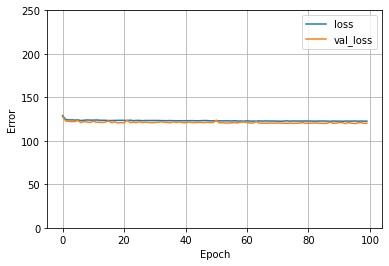

In [16]:
%%time
#1 var test
temp = np.array(train_features['temp'])
temp_norm = preprocessing.Normalization(input_shape=[1,])
temp_norm.adapt(temp)
dnn_temp_model = run_model(temp_norm,'dnn', train_features['temp'], train_labels, 100, 0.01, True)

#save results
test_results['dnn_temp_model'] = dnn_temp_model.evaluate(test_features['temp'], test_labels, verbose=0)

dnn_temp_model.summary()

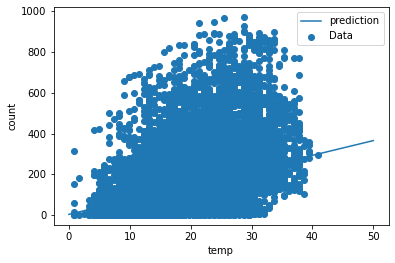

In [17]:
x = tf.linspace(0.0, 50, 2)
y=dnn_temp_model.predict(x)
plot_temp(x,y)

          loss    val_loss  epoch
95  103.237846  101.774132     95
96  103.237991  101.791473     96
97  103.238152  101.795502     97
98  103.232613  101.818504     98
99  103.232246  101.817062     99
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 18        
Total params: 53
Trainable params: 18
Non-trainable params: 35
_________________________________________________________________
Wall time: 24.6 s


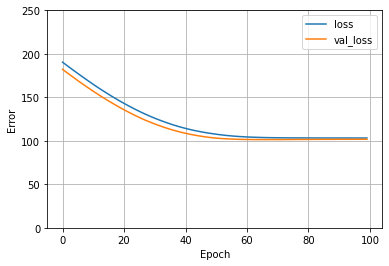

In [18]:
%%time
#run linear model
linear_model = run_model(normalizer,'linear', train_features, train_labels, 100, 0.01, True)

#save results
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

linear_model.summary()

          loss   val_loss  epoch
295  24.356493  38.429588    295
296  23.791782  36.730186    296
297  23.995264  37.493618    297
298  23.599932  38.161072    298
299  24.031723  35.985428    299
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 9,572
Trainable params: 9,537
Non-traina

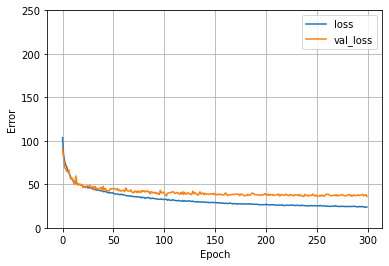

In [19]:
%%time

#run dnn model
dnn_model = run_model(normalizer,'dnn', train_features, train_labels, 300, 0.01, True)

#save results
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

dnn_model.summary()

In [20]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
dnn_temp_model,124.507919
linear_model,103.306450
dnn_model,39.868572


In [21]:
def plot_predictions(test_predictions, test_labeles):
    a = plt.axes(aspect='equal')
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    lims = [0,1100]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

In [22]:
def model_error(test_predictions, test_labels):
    error = test_predictions - test_labels
    plt.hist(error, bins=25)
    plt.xlabel('Error')
    _ = plt.ylabel('Count')

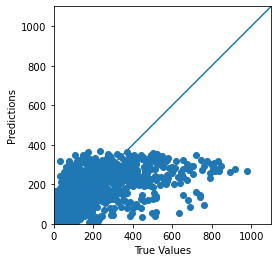

In [23]:
linear_test_predictions = linear_model.predict(test_features).flatten()
plot_predictions(linear_test_predictions, test_labels)

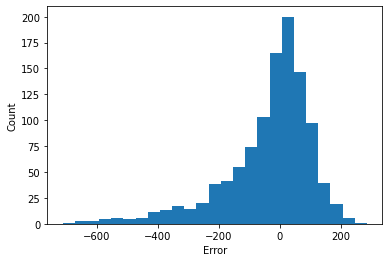

In [24]:
model_error(linear_test_predictions, test_labels)

In [25]:
linear_model.trainable_variables

[<tf.Variable 'dense_4/kernel:0' shape=(17, 1) dtype=float32, numpy=
 array([[ -1.0557015 ],
        [ -7.7693233 ],
        [ 30.37639   ],
        [ 29.528234  ],
        [-41.298367  ],
        [  0.23326911],
        [  8.704047  ],
        [  0.6373098 ],
        [ 52.201283  ],
        [-13.374477  ],
        [  1.6509867 ],
        [  0.77365315],
        [ 10.33558   ],
        [ -1.4639534 ],
        [  1.0712627 ],
        [ -3.3092065 ],
        [  4.2892857 ]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([156.43977], dtype=float32)>]

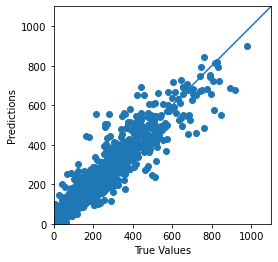

In [26]:
dnn_test_predictions = dnn_model.predict(test_features).flatten()
plot_predictions(dnn_test_predictions, test_labels)

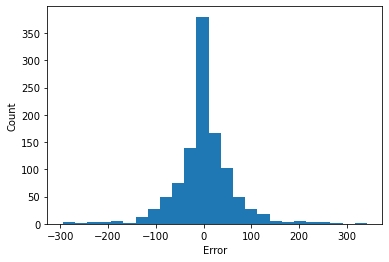

In [27]:
model_error(dnn_test_predictions, test_labels)